# Assignment C [25 marks]

### Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

### 1/. Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

### 2/. Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

### 3/. Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

### 4/. Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

### 5/. Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis].  Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

## Preliminaries

In [1]:
# Importing pandas, numpy and matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

In [2]:
# All GP practices in the Dec2015 dataset presented in a tabulation.
cols2 = ['yearmonth', 'practice', 'name', 'address1', 'address2', 'address3', 'address4', 'postcode']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
gp_practices =  pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())

# Creation of a new column containing the postcode prefix.
gp_practices['post_code'] = (gp_practices['postcode'].str.split().str[0])
gp_practices = gp_practices.astype(str).apply(lambda x: x.str.lower())

In [3]:
# Total number of prescriptions for all GP practices in the Dec2015 dataset presented in a tabulation.
cols2 = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
gp_prescriptions = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_prescriptions = gp_prescriptions.astype(str).apply(lambda x: x.str.lower())

In [4]:
# The January 2016 GP practice registration data is used here as no dataset for December 2015 exists.
# 2016 GP practice registration data relating to the 'Numbers of Patients Registered at a GP Practice'.
cols2 = ['practice', 'postcode', 'ons_ccg_code', 'ccg_code', 'ons_region_code', 'nhse_region_code', 'ons_comm_rgn_code', 'nhse_comm_region_code', 'total_all', 'total_male', 'total_female', 'male_0-4', 'male_5-9', 'male_10-14', 'male_15-19', 'male_20-24', 'male_25-29', 'male_30-34', 'male_35-39', 'male_40-44', 'male_45-49', 'male_50-54', 'male_55-59', 'male_60-64', 'male_65-69', 'male_70-74', 'male_75-79', 'male_80-84', 'male_85-89', 'male_90-94', 'male_95+', 'female_0-4', 'female_5-9', 'female_10-14', 'female_15-19', 'female_20-24', 'female_25-29', 'female_30-34', 'female_35-39', 'female_40-44', 'female_45-49', 'female_50-54', 'female_55-59', 'female_60-64', 'female_65-69', 'female_70-74','female_75-79', 'female_80-84', 'female_85-89', 'female_90-94', 'female_95+']
url='https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
gp_registered = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
gp_registered = gp_registered.astype(str).apply(lambda x: x.str.lower())

In [5]:
# Converting the 'act_cost' column values to floats, 'items' column values as floats and the 'quantity' column values to integers.
gp_prescriptions['act_cost'] = gp_prescriptions['act_cost'].astype(float)
gp_prescriptions['items'] = gp_prescriptions['items'].astype(int)
gp_prescriptions['quantity'] = gp_prescriptions.quantity.astype(int)

# Converting the 'total_all' column values to integers.
gp_registered['total_all'] = gp_registered['total_all'].astype(int)

In [6]:
# Merge of the GP practices and their associated prescriptions.
df_national = pd.merge(gp_practices, gp_prescriptions, on='practice')

# The dataframe presents the first 100 GP practices for representation purposes.
df_national.head(100)

,yearmonth,practice,name,address1,address2,address3,address4,postcode,post_code,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101010c0aaaaaa,alum hydrox_cap 475mg,1,6.4,6.03,56,201512
1,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101010g0aaabab,co-magaldrox_susp 195mg/220mg/5ml s/f,1,2.99,2.78,500,201512
2,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101010j0aaaaaa,mag trisil_mix,2,2.56,2.39,400,201512
3,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101010r0bcaaab,infacol_susp 40mg/ml s/f,2,8.13,7.54,150,201512
4,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101012b0aaabab,sod bicarb_oral soln 420mg/5ml s/f,1,278.6,257.62,700,201512
5,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101021b0aaahah,alginate_raft-forming oral susp s/f,2,2.34,2.18,600,201512
6,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101021b0aaalal,sod algin/pot bicarb_susp s/f,8,46.08,42.71,4500,201512
7,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101021b0aaapap,sod alginate/pot bicarb_tab chble 500mg,1,3.07,2.85,60,201512
8,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101021b0beacah,gaviscon_liq orig aniseed relief,7,49.44,46.10,3900,201512
9,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0101021b0beadaj,gaviscon infant_sach 2g (dual pack) s/f,22,474.12,438.66,1620,201512


In [7]:
df_national.shape

(10270847, 18)

## 1/. Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [8]:
# For national GP-practices; the tabulation of 'simvastatin', 'atorvastatin', 'rosuvastatin', 'pravastatin', 'fluvastatin' prescriptions.
df_statin1 = df_national[df_national['bnf_name'].map(lambda bnf_name: 'simvastatin' in bnf_name)]
df_statin2 = df_national[df_national['bnf_name'].map(lambda bnf_name: 'atorvastatin' in bnf_name)]
df_statin3 = df_national[df_national['bnf_name'].map(lambda bnf_name: 'rosuvastatin' in bnf_name)]
df_statin4 = df_national[df_national['bnf_name'].map(lambda bnf_name: 'pravastatin' in bnf_name)]
df_statin5 = df_national[df_national['bnf_name'].map(lambda bnf_name: 'fluvastatin' in bnf_name)]
df_statin= pd.concat([df_statin1, df_statin2, df_statin3, df_statin4, df_statin5])
df_statin = df_statin.drop_duplicates()

# The dataframe presents the first 100 records for representation purposes.
df_statin.head(100)

,yearmonth,practice,name,address1,address2,address3,address4,postcode,post_code,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
396,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000acaaabab,simvastatin/ezetimibe_tab 40mg/10mg,1,38.98,36.06,28,201512
418,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000y0aaaaaa,simvastatin_tab 10mg,33,41.16,38.47,1372,201512
419,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000y0aaabab,simvastatin_tab 20mg,281,408.98,381.84,12054,201512
420,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000y0aaadad,simvastatin_tab 40mg,808,1348.14,1261.16,34004,201512
421,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000y0aaahah,simvastatin_tab 80mg,1,3.98,3.69,56,201512
422,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,q45,00k,0212000y0aaalal,simvastatin_oral susp 40mg/5ml s/f,1,182.4,168.67,150,201512
2402,201512,a81003,victoria medical practice,the health centre,victoria road,hartlepool,cleveland,ts26 8db,ts26,q45,00k,0212000y0aaaaaa,simvastatin_tab 10mg,13,8.61,8.64,287,201512
2403,201512,a81003,victoria medical practice,the health centre,victoria road,hartlepool,cleveland,ts26 8db,ts26,q45,00k,0212000y0aaabab,simvastatin_tab 20mg,98,95.74,90.85,2821,201512
2404,201512,a81003,victoria medical practice,the health centre,victoria road,hartlepool,cleveland,ts26 8db,ts26,q45,00k,0212000y0aaadad,simvastatin_tab 40mg,120,147.08,137.58,3710,201512
2405,201512,a81003,victoria medical practice,the health centre,victoria road,hartlepool,cleveland,ts26 8db,ts26,q45,00k,0212000y0aaahah,simvastatin_tab 80mg,6,17.91,16.63,252,201512


In [9]:
df_statin.shape

(113248, 18)

In [10]:
# Tabulation of statin prescriptions grouped by national GP practice.
df_statin_grp = df_statin.groupby('practice').sum()
df_statin_grp = df_statin_grp.reset_index()
df_statin_grp = df_statin_grp.round(2)
df_statin_grp.head(10)

,practice,items,act_cost,quantity
0,a81002,2460,6513.51,98340
1,a81003,605,868.39,17464
2,a81004,919,2134.60,36302
3,a81005,1264,1887.11,35575
4,a81006,1958,4074.99,61603
5,a81007,999,2245.57,40659
6,a81008,1101,1398.07,26625
7,a81009,1150,1588.11,31029
8,a81011,1274,2945.80,56035
9,a81012,629,950.01,12754


In [11]:
# Using the January 2016 GP practice registration dataset. 
# Merge of national GP practice, their associated statin prescriptions and registered patient datasets.
df_merge_statin_all = pd.merge(df_statin_grp, gp_registered, on='practice')
df_merge_statin_all = df_merge_statin_all.drop_duplicates()

# Creating a new column named relative_patient_cost
# The total_all (total number of patients per practice) value was used as data on the individual patient numbers relating to statin use is not available.
def relative_cost(act_cost, total_all):
    return act_cost / total_all
df_merge_statin_all['relative_patient_cost'] = relative_cost(df_merge_statin_all['act_cost'], df_merge_statin_all['total_all'])

# Tabulation of the relative_patient_cost, alongside the act_cost and total_all (total number of patients per practice) values for comparison.
df_relative = df_merge_statin_all[['practice', 'relative_patient_cost', 'act_cost', 'total_all']]
df_relative_sort = df_relative.sort_values(by='relative_patient_cost', ascending=0).round(4)

# The dataframe presents the first 100 GP practices for representation purposes.
df_relative_sort.head(100)

,practice,relative_patient_cost,act_cost,total_all
2548,e87723,995.7400,995.74,1
4150,h84608,2.3047,4669.32,2026
3539,g82651,2.0600,2.06,1
7649,y04786,1.9630,620.32,316
4932,k84066,1.1832,459.08,388
2542,e87711,1.0385,294.92,284
2747,f81633,0.9811,3299.53,3363
6148,m88646,0.9739,2047.06,2102
5771,m84031,0.8966,6009.11,6702
2538,e87694,0.8772,225.45,257


In [12]:
df_relative_sort.shape

(7676, 4)

In [13]:
#

In [14]:
#

## 2/. Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [15]:
# English deprivation indices - Index of Multiple Deprivation(IMD).
cols2 = ['postcode', 'postcode_status', 'lsoa_code', 'lsoa_Name', 'index_of_multiple_deprivation_rank', 'index_of_multiple_deprivation_decile', 'income_rank', 'income_decile', 'income_score', 'employment_rank', 'employment_decile', 'employment_score', 'education_and_skills_rank', 'education_and_skills_decile', 'health_and_disability_rank', 'health_and_disability_decile', 'crime_rank', 'crime_decile', 'barriers_to_housing_and_services_rank', 'barriers_to_housing_and_services_decile', 'living_environment_rank', 'living_environment_decile', 'idaci_rank', 'idaci_decile', 'idaci_score', 'idaopi_rank', 'idaopi_decile', 'idaopi_score']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'
df_gp_imd = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
df_gp_imd = df_gp_imd.astype(str).apply(lambda x: x.str.lower())
df_gp_imd['index_of_multiple_deprivation_rank'] = df_gp_imd.index_of_multiple_deprivation_rank.str.replace(r'\s+','').astype(float)

# The dataframe presents the first 100 GP practices for representation purposes.
df_gp_imd.head(100)

,postcode,postcode_status,lsoa_code,lsoa_Name,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_rank,income_decile,income_score,employment_rank,...,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_rank,living_environment_decile,idaci_rank,idaci_decile,idaci_score,idaopi_rank,idaopi_decile,idaopi_score
0,ts18 1hu,live,e01033477,stockton-on-tees 014g e01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.42200000000000004,817.0,1.0,0.5
1,ts18 2aw,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
2,ts26 8db,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
3,ts1 3be,live,e01012068,middlesbrough 001a e01012068,1914.0,1.0,3124.0,1.0,0.306,6166.0,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.42200000000000004,948.0,1.0,0.488
4,ts14 7dj,live,e01012117,redcar and cleveland 018a e01012117,7082.0,3.0,5343.0,2.0,0.252,4058.0,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.3,5907.0,2.0,0.299
5,ts18 2at,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
6,ts24 7pw,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
7,ts6 6td,live,e01033470,redcar and cleveland 022g e01033470,664.0,1.0,520.0,1.0,0.42200000000000004,274.0,...,27372.0,9.0,24413.0,8.0,1126.0,1.0,0.47700000000000004,1840.0,1.0,0.429
8,ts5 6hf,live,e01012078,middlesbrough 005a e01012078,2155.0,1.0,1945.0,1.0,0.34299999999999997,2629.0,...,25935.0,8.0,2454.0,1.0,659.0,1.0,0.51,3897.0,2.0,0.349
9,ts24 7pw,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409


In [16]:
df_gp_imd.shape

(9906, 28)

In [17]:
# The IMD live postcode status at a national level, excluding terminated and unknown postcode status.
df_live = df_gp_imd[df_gp_imd['postcode_status'].map(lambda postcode_status: 'live' in postcode_status)]
df_live['index_of_multiple_deprivation_rank'].astype(float)

# The dataframe presents the first 100 rows for representation purposes.
df_live.head(100)

,postcode,postcode_status,lsoa_code,lsoa_Name,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_rank,income_decile,income_score,employment_rank,...,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_rank,living_environment_decile,idaci_rank,idaci_decile,idaci_score,idaopi_rank,idaopi_decile,idaopi_score
0,ts18 1hu,live,e01033477,stockton-on-tees 014g e01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.42200000000000004,817.0,1.0,0.5
1,ts18 2aw,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
2,ts26 8db,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
3,ts1 3be,live,e01012068,middlesbrough 001a e01012068,1914.0,1.0,3124.0,1.0,0.306,6166.0,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.42200000000000004,948.0,1.0,0.488
4,ts14 7dj,live,e01012117,redcar and cleveland 018a e01012117,7082.0,3.0,5343.0,2.0,0.252,4058.0,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.3,5907.0,2.0,0.299
5,ts18 2at,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
6,ts24 7pw,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
7,ts6 6td,live,e01033470,redcar and cleveland 022g e01033470,664.0,1.0,520.0,1.0,0.42200000000000004,274.0,...,27372.0,9.0,24413.0,8.0,1126.0,1.0,0.47700000000000004,1840.0,1.0,0.429
8,ts5 6hf,live,e01012078,middlesbrough 005a e01012078,2155.0,1.0,1945.0,1.0,0.34299999999999997,2629.0,...,25935.0,8.0,2454.0,1.0,659.0,1.0,0.51,3897.0,2.0,0.349
9,ts24 7pw,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409


In [18]:
df_live.shape

(9833, 28)

In [19]:
# A tabulation of the 68 GP Practices in Wolverhampton showing for practice and postcode.
dfwol1 = gp_practices[gp_practices['address3'].map(lambda address3: 'wolverh' in address3)]
dfwol2 = gp_practices[gp_practices['address4'].map(lambda address4: 'wolverh' in address4)]
dfwol3 = pd.concat([dfwol1, dfwol2])
dfwol4 = dfwol3[['practice', 'postcode']]
dfwol4

,practice,postcode
5061,m82021,wv7 3dt
5112,m83018,wv5 9ha
5123,m83031,wv8 1hd
5175,m83097,wv8 1dx
5190,m83125,wv5 7by
5196,m83132,wv6 7pd
5225,m83668,wv6 7ql
5684,m92006,wv3 7na
5685,m92007,wv3 0ls
5686,m92008,wv3 8jn


In [20]:
dfwol4.shape

(68, 2)

In [21]:
# The associated Index of Multiple Deprivation (IMD) for each GP practice in Wolverhampton.
df_merge_wol_postcode = pd.merge(dfwol4, df_live, on='postcode')
df_merge_wol_postcode = df_merge_wol_postcode.drop_duplicates()
df_merge_wol_postcode

,practice,postcode,postcode_status,lsoa_code,lsoa_Name,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_rank,income_decile,income_score,...,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_rank,living_environment_decile,idaci_rank,idaci_decile,idaci_score,idaopi_rank,idaopi_decile,idaopi_score
0,m82021,wv7 3dt,live,e01028845,bridgnorth 002d e01028845,30964.0,10.0,27921.0,9.0,0.05,...,32224.0,10.0,19401.0,6.0,29241.0,9.0,0.045,26232.0,8.0,0.079
1,m83018,wv5 9ha,live,e01029676,south staffordshire 012c e01029676,23253.0,8.0,16263.0,5.0,0.115,...,27260.0,9.0,19631.0,6.0,17940.0,6.0,0.131,15041.0,5.0,0.16399999999999998
2,m83031,wv8 1hd,live,e01029627,south staffordshire 008d e01029627,15137.0,5.0,9152.0,3.0,0.18899999999999997,...,28073.0,9.0,19564.0,6.0,10153.0,4.0,0.235,10008.0,4.0,0.225
3,m83097,wv8 1dx,live,e01029615,south staffordshire 008c e01029615,10468.0,4.0,6553.0,2.0,0.22899999999999998,...,29128.0,9.0,16317.0,5.0,8600.0,3.0,0.262,9453.0,3.0,0.233
4,m83125,wv5 7by,live,e01028842,bridgnorth 006c e01028842,19643.0,6.0,23702.0,8.0,0.069,...,5012.0,2.0,1639.0,1.0,19727.0,7.0,0.113,26724.0,9.0,0.076
5,m83132,wv6 7pd,live,e01029666,south staffordshire 011c e01029666,10263.0,4.0,6220.0,2.0,0.23600000000000002,...,28377.0,9.0,29152.0,9.0,11587.0,4.0,0.212,2073.0,1.0,0.418
6,m83668,wv6 7ql,live,e01029664,south staffordshire 011b e01029664,28039.0,9.0,21801.0,7.0,0.079,...,24073.0,8.0,29019.0,9.0,24112.0,8.0,0.078,19493.0,6.0,0.12300000000000001
7,m92006,wv3 7na,live,e01010516,wolverhampton 026d e01010516,22747.0,7.0,22396.0,7.0,0.076,...,17217.0,6.0,20661.0,7.0,24656.0,8.0,0.075,24375.0,8.0,0.08900000000000001
8,m92007,wv3 0ls,live,e01010463,wolverhampton 020a e01010463,3535.0,2.0,2798.0,1.0,0.315,...,15027.0,5.0,3754.0,2.0,3691.0,2.0,0.374,2359.0,1.0,0.40399999999999997
9,m92008,wv3 8jn,live,e01010552,wolverhampton 019d e01010552,15949.0,5.0,12097.0,4.0,0.154,...,23675.0,8.0,21160.0,7.0,14708.0,5.0,0.168,11633.0,4.0,0.203


In [22]:
df_merge_wol_postcode.shape

(68, 29)

In [23]:
# The associated Index of Multiple Deprivation (IMD) rank by GP practices in Wolverhampton.
df_wol_imd = df_merge_wol_postcode[['practice', 'index_of_multiple_deprivation_rank']]
df_wol_imd_sort = df_wol_imd.sort_values(by='index_of_multiple_deprivation_rank', ascending=0).round(4)
df_wol_imd_sort

,practice,index_of_multiple_deprivation_rank
0,m82021,30964.0
6,m83668,28039.0
12,m92011,27354.0
48,y03018,26173.0
51,y03457,26173.0
54,y04442,26173.0
11,m92010,25622.0
43,y02594,25587.0
1,m83018,23253.0
7,m92006,22747.0


In [24]:
df_wol_imd_sort.shape

(68, 2)

In [25]:
#

In [26]:
#

## 3/. Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [27]:
# Tabulation of national GP practices and their respective postcodes.
df_national_postcode = df_national[['practice', 'postcode']]
df_national_postcode = df_national_postcode.drop_duplicates()
df_national_postcode.head()

,practice,postcode
0,a81002,ts18 2aw
2207,a81003,ts26 8db
3057,a81004,ts1 3be
4602,a81005,ts14 7dj
6094,a81006,ts18 2at


In [28]:
df_national_postcode.shape

(9905, 2)

In [29]:
# Merge of national GP practice postcodes and the national IMD dataset.
df_merge_all_postcode = pd.merge(df_national_postcode, df_live, on='postcode')
df_merge_all_postcode = df_merge_all_postcode.drop_duplicates()

# The dataframe presents the first 100 rows for representation purposes.
df_merge_all_postcode.head(100)

,practice,postcode,postcode_status,lsoa_code,lsoa_Name,index_of_multiple_deprivation_rank,index_of_multiple_deprivation_decile,income_rank,income_decile,income_score,...,barriers_to_housing_and_services_rank,barriers_to_housing_and_services_decile,living_environment_rank,living_environment_decile,idaci_rank,idaci_decile,idaci_score,idaopi_rank,idaopi_decile,idaopi_score
0,a81002,ts18 2aw,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
1,a81003,ts26 8db,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
4,a81060,ts26 8db,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
7,a81613,ts26 8db,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409
10,a81004,ts1 3be,live,e01012068,middlesbrough 001a e01012068,1914.0,1.0,3124.0,1.0,0.306,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.42200000000000004,948.0,1.0,0.488
11,a81005,ts14 7dj,live,e01012117,redcar and cleveland 018a e01012117,7082.0,3.0,5343.0,2.0,0.252,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.3,5907.0,2.0,0.299
13,a81032,ts14 7dj,live,e01012117,redcar and cleveland 018a e01012117,7082.0,3.0,5343.0,2.0,0.252,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.3,5907.0,2.0,0.299
15,a81006,ts18 2at,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
17,a81609,ts18 2at,live,e01012267,stockton-on-tees 014f e01012267,551.0,1.0,433.0,1.0,0.434,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
19,a81007,ts24 7pw,live,e01011999,hartlepool 007d e01011999,967.0,1.0,746.0,1.0,0.402,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.48100000000000004,2268.0,1.0,0.409


In [30]:
df_merge_all_postcode.shape

(9832, 29)

In [31]:
#

### Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. 

In [32]:
# Reminder of the number of statin prescribing national GP practices.
df_relative.shape

(7676, 4)

In [33]:
# Top decile for relative spenders on statins using exising statin prescription list as in Part C, Q1.
df_relative_topdecile = df_relative_sort[df_relative_sort['relative_patient_cost'] >= df_relative_sort['relative_patient_cost'].quantile(0.9)]
df_relative_topdecile_pc = pd.merge(df_relative_topdecile, df_merge_all_postcode, on='practice')
df_relative_topdecile_pcode = df_relative_topdecile_pc[['practice', 'relative_patient_cost', 'act_cost', 'total_all', 'postcode']]
df_relative_topdecile_pcode

,practice,relative_patient_cost,act_cost,total_all,postcode
0,e87723,995.7400,995.74,1,w9 2af
1,h84608,2.3047,4669.32,2026,tw9 1px
2,g82651,2.0600,2.06,1,tn3 9py
3,y04786,1.9630,620.32,316,ig3 8yb
4,k84066,1.1832,459.08,388,ox1 1td
5,e87711,1.0385,294.92,284,sw3 4sr
6,f81633,0.9811,3299.53,3363,co11 2hd
7,m88646,0.9739,2047.06,2102,b70 7aw
8,m84031,0.8966,6009.11,6702,cv23 0lu
9,e87694,0.8772,225.45,257,sw1w 0qh


In [34]:
df_relative_topdecile.shape

(768, 4)

In [35]:
# Bottom decile for relative spenders on statins using exising statin prescription list as in Part C, Q1.
df_relative_bottomdecile = df_relative_sort[df_relative_sort['relative_patient_cost'] <= df_relative_sort['relative_patient_cost'].quantile(0.1)]
df_relative_bottomdecile_pc = pd.merge(df_relative_bottomdecile, df_merge_all_postcode, on='practice')
df_relative_bottomdecile_pcode = df_relative_bottomdecile_pc[['practice', 'relative_patient_cost', 'act_cost', 'total_all', 'postcode']]
df_relative_bottomdecile_pcode

,practice,relative_patient_cost,act_cost,total_all,postcode
0,h84623,0.1223,1101.36,9003,tw12 1ny
1,h83002,0.1223,341.26,2790,cr0 1ez
2,h84039,0.1223,1283.89,10497,tw1 4qp
3,y00568,0.1223,423.12,3460,ex4 2bh
4,a86003,0.1222,3964.58,32431,ne1 8dq
5,e82603,0.1222,293.42,2401,wd18 0jp
6,m86613,0.1222,357.32,2925,cv2 4lj
7,b86019,0.1222,1126.03,9218,ls7 3dr
8,f83682,0.1222,218.78,1791,nw3 1pd
9,h81029,0.1221,1473.30,12064,gu1 4rp


In [36]:
df_relative_bottomdecile.shape

(768, 4)

In [37]:
#

### For all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD)

In [38]:
# The top decile of statin prescribing national GP practices and their associated IMD ranking.
df_relative_topdecile_pc_imd = df_relative_topdecile_pc[['practice', 'relative_patient_cost', 'act_cost', 'total_all', 'postcode', 'index_of_multiple_deprivation_rank']]
df_relative_topdecile_pc_imd_sort = df_relative_topdecile_pc_imd.sort_values(by='index_of_multiple_deprivation_rank', ascending=0).round(4)
df_relative_topdecile_pc_imd_sort

,practice,relative_patient_cost,act_cost,total_all,postcode,index_of_multiple_deprivation_rank
22,b86010,0.6884,6332.22,9198,ls22 5bq,32639.0
345,n81018,0.4051,3156.79,7792,cw6 0be,32469.0
211,g82013,0.4424,5806.50,13124,tn13 3aq,32306.0
129,c83031,0.4898,5582.47,11398,ln2 2rs,32189.0
355,j81046,0.4028,4697.72,11664,bh18 8ee,31895.0
493,m83013,0.3779,1868.95,4945,de13 8pd,31867.0
164,j81054,0.4653,4538.96,9754,bh14 8ee,31806.0
93,g82226,0.5294,2456.40,4640,me8 0pw,31759.0
257,f81104,0.4281,1862.85,4351,cm12 9lr,31750.0
453,g84033,0.3848,2664.32,6924,br2 7jf,31699.0


In [39]:
# The bottom decile of statin prescribing national GP practices and their associated IMD ranking.
df_relative_bottomdecile_pc['index_of_multiple_deprivation_rank'].astype(float)
df_relative_bottomdecile_pc_imd = df_relative_bottomdecile_pc[['practice', 'relative_patient_cost', 'act_cost', 'total_all', 'postcode', 'index_of_multiple_deprivation_rank']]
df_relative_bottomdecile_pc_imd_sort = df_relative_bottomdecile_pc_imd.sort_values(by='index_of_multiple_deprivation_rank', ascending=0).round(4)
df_relative_bottomdecile_pc_imd_sort

,practice,relative_patient_cost,act_cost,total_all,postcode,index_of_multiple_deprivation_rank
104,k81060,0.1178,1219.89,10359,rg42 5jg,32837.0
337,k81092,0.1011,1215.62,12022,rg41 3dr,32795.0
359,k84079,0.0988,896.39,9069,ox14 1xr,32749.0
445,l81632,0.0907,976.50,10761,bs16 7al,32619.0
688,y02379,0.0354,46.77,1320,kt2 5qh,32313.0
738,l81617,0.0090,109.64,12215,ba2 7ay,32274.0
571,b81666,0.0725,160.06,2209,hu14 3db,32254.0
219,h81647,0.1111,260.10,2341,gu4 7js,32232.0
34,j82023,0.1210,1594.33,13176,po15 7lb,32153.0
296,e82057,0.1048,560.19,5344,sg13 7ee,32020.0


In [40]:
df_relative_bottomdecile_pc_imd_sort.dtypes

practice                               object
relative_patient_cost                 float64
act_cost                              float64
total_all                               int64
postcode                               object
index_of_multiple_deprivation_rank    float64
dtype: object

In [41]:
#

### Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [42]:
# Descriptive statistics of the top decile of statin prescribing national GP practices and their respective IMD.
df_relative_topdecile_pc_imd.describe()

,relative_patient_cost,act_cost,total_all,index_of_multiple_deprivation_rank
count,765.000000,765.000000,765.000000,765.000000
mean,1.735194,2600.023490,6205.223529,13834.920261
std,35.985651,1624.960917,3786.692172,9177.283258
min,0.341100,2.060000,1.000000,43.000000
25%,0.364000,1365.320000,3222.000000,5465.000000
50%,0.397600,2231.620000,5460.000000,12933.000000
75%,0.450300,3496.410000,8720.000000,21538.000000
max,995.740000,11679.920000,22401.000000,32639.000000


In [43]:
# Descriptive statistics of the bottom decile of statin prescribing national GP practices and their respective IMD.
df_relative_bottomdecile_pc_imd.describe()

,relative_patient_cost,act_cost,total_all,index_of_multiple_deprivation_rank
count,767.000000,767.000000,767.000000,767.000000
mean,0.087110,649.328096,7456.192960,12273.286832
std,0.032133,546.958934,5623.198555,8904.879241
min,0.000400,0.890000,16.000000,27.000000
25%,0.072000,275.715000,3672.500000,5015.000000
50%,0.096500,507.910000,6160.000000,9962.000000
75%,0.112700,881.095000,9758.500000,18931.000000
max,0.122300,4296.310000,39138.000000,32837.000000


## Summary.
### In the top decile of national GP practices, relative statin spending ranges from £0.34 to £995.74 per GP practice patient, with a mean spend of £1.74.
### The top decile has a IMD ranking from 43 to 32639 with a mean IMD rank of 13835.

### In the bottom decile of national GP practices, relative statin spending ranges from £0.0004 to £1.2223 per GP practice patient, with a mean spend of £0.087.
### The bottom decile has a IMD ranking from 27 to 32837 with a mean IMD rank of 12273.

### As expected the relative statin spend per patient is higher for the top decile than for the bottom decile GP practices.
### However, there does not seem to be a significant difference between the top decile and bottom decile min, max and mean IMD rankings.
### Although the median and interquartile ranges vary slightly.

In [44]:
#

## 4/. Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [45]:
# ONS Postcode Lookup.
# Example region code = E0900001
cols2 = ['postcode_1', 'postcode_2', 'postcode', 'date_introduced', 'user_type', 'easting', 'northing', 'positional_quality', 'level_code', 'county_name', 'local_authority_code', 'local_authority_name', 'ward_code', 'ward_name', 'country_code', 'country_name', 'level', 'region_name', 'parliamentary_constituency_code', 'parliamentary_constituency_name', 'european_electoral_region_code', 'european_electoral_region_name', 'primary_care_trust_code', 'primarycar_trust_name', 'lower_super_output_area_code', 'lower_super_output_area_name', 'middle_super_output_area_code', 'middle_super_output_area_name', 'output_area_classification_code', 'output_area_classification_name', 'longitude', 'latitude', 'spatial_accuracy', 'last_uploaded', 'location', 'socrata_id']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv'
df_gp_ons = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
df_gp_ons = df_gp_ons.astype(str).apply(lambda x: x.str.lower()).astype(object)

# The dataframe presents the first 100 rows for representation purposes.
df_gp_ons.head(100)

,postcode_1,postcode_2,postcode,date_introduced,user_type,easting,northing,positional_quality,level_code,county_name,...,middle_super_output_area_code,middle_super_output_area_name,output_area_classification_code,output_area_classification_name,longitude,latitude,spatial_accuracy,last_uploaded,location,socrata_id
0,s20 6ru,s20 6ru,s20 6ru,06-1997,0,441432.0,382852.0,1,e99999999,(pseudo) england (ua/md/lb),...,e02001671,nan,6b3,suburbanites;semi-detached suburbia;semi-detac...,-1.3791930000000001,53.340953000000006,postcode level,21/09/2017,"(53.340953, -1.379193)",1311804
1,tw4 7bd,tw4 7bd,tw4 7bd,01-1980,0,512373.0,175453.0,1,e99999999,(pseudo) england (ua/md/lb),...,e02000541,nan,4b1,multicultural metropolitans;challenged asian t...,-0.383652,51.466899,postcode level,21/09/2017,"(51.466899, -0.383652)",1630253
2,gu513zq,gu51 3zq,gu51 3zq,05-2003,1,481569.0,155037.0,1,e10000014,hampshire,...,e02004757,nan,6b4,suburbanites;semi-detached suburbia;older work...,-0.831674,51.288637,postcode level,21/09/2017,"(51.288637, -0.831674)",652126
3,ox4 6be,ox4 6be,ox4 6be,06-2000,0,455440.0,203036.0,1,e10000025,oxfordshire,...,e02005956,nan,4a1,multicultural metropolitans;rented family livi...,-1.198788,51.723313,postcode level,21/09/2017,"(51.723313, -1.198788)",1158807
4,ta7 9jh,ta7 9jh,ta7 9jh,01-1980,0,338745.0,139337.0,1,e10000027,somerset,...,e02006072,nan,1a2,rural residents;farming communities;establishe...,-2.877144,51.149999,postcode level,21/09/2017,"(51.149999, -2.877144)",1547901
5,co124ps,co12 4ps,co12 4ps,01-1980,0,623480.0,231987.0,1,e10000012,essex,...,e02004574,nan,8a1,hard-pressed living;industrious communities;in...,1.250003,51.941475,postcode level,21/09/2017,"(51.941475, 1.250003)",326121
6,g15 7ds,g15 7ds,g15 7ds,01-1980,0,251920.0,671413.0,1,s99999999,(pseudo) scotland,...,s02001976,nan,7c2,constrained city dwellers;white communities;co...,-4.370735,55.912955000000004,postcode level,21/09/2017,"(55.912955, -4.370735)",584541
7,le4 4lu,le4 4lu,le4 4lu,01-1980,0,459285.0,309986.0,1,e10000018,leicestershire,...,e02005364,nan,8a1,hard-pressed living;industrious communities;in...,-1.124441,52.684332,postcode level,21/09/2017,"(52.684332, -1.124441)",846727
8,sg180bw,sg18 0bw,sg18 0bw,01-1980,0,519092.0,245120.0,1,e99999999,(pseudo) england (ua/md/lb),...,e02003603,nan,8d2,hard-pressed living;migration and churn;hard-p...,-0.263092,52.091621,postcode level,21/09/2017,"(52.091621, -0.263092)",1387276
9,cm2 7fh,cm2 7fh,cm2 7fh,01-2008,0,571961.0,205620.0,1,e10000012,essex,...,e02004498,nan,7a2,constrained city dwellers;challenged diversity...,0.488242,51.722934,postcode level,21/09/2017,"(51.722934, 0.488242)",312757


In [46]:
df_gp_ons.shape

(1756189, 36)

In [47]:
# Under 75 CVD mortality rates.
# The breakdown column is filtered for the region codes, which will be matched to the ons region code.
cols2 = ['year', 'period_of_coverage', 'breakdown', 'level', 'level_description', 'gender', 'age', 'indicator_value', 'lower_ci', 'upper_ci', 'numerator', 'denominator']
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'
df_75cvd = pd.read_csv(url, header=None, names=cols2, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
df_75cvd = df_75cvd.astype(str).apply(lambda x: x.str.lower()).astype(object)

# The dataframe presents the first 100 rows for representation purposes.
df_75cvd.head(100)

,year,period_of_coverage,breakdown,level,level_description,gender,age,indicator_value,lower_ci,upper_ci,numerator,denominator
0,2016,1/1/2016 to 31/12/2016,england,england,england,person,all,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,england,england,england,person,all,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,england,england,england,person,all,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,england,england,england,person,all,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,england,england,england,person,all,77.7,76.8,78.5,"33,258","49,281,700"
5,2011,1/1/2011 to 31/12/2011,england,england,england,person,all,80.5,79.6,81.3,"33,783","48,969,700"
6,2010,1/1/2010 to 31/12/2010,england,england,england,person,all,89.5,88.6,90.4,"37,155","48,569,300"
7,2009,1/1/2009 to 31/12/2009,england,england,england,person,all,91.8,90.9,92.7,"37,480","48,183,900"
8,2008,1/1/2008 to 31/12/2008,england,england,england,person,all,98.8,97.8,99.8,"39,590","47,839,700"
9,2007,1/1/2007 to 31/12/2007,england,england,england,person,all,103.9,102.9,104.9,"40,842","47,442,600"


In [48]:
df_75cvd.shape

(1050, 12)

In [49]:
#

### Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [50]:
# By regional level.
# Tabulation of the region codes and related level descriptions.
df_75cvd_region = df_75cvd[df_75cvd.breakdown == 'region']
df_75cvd_region = df_75cvd_region.sort_values(by='level', ascending=1)

# For 2015 and for both genders combined.
df_nine_reg = df_75cvd_region[df_75cvd_region.year == '2015']
df_nine_regions = df_nine_reg[df_nine_reg.gender == 'person']

df_nine_regions['numerator'] = df_nine_regions['numerator'].str.replace(',', '')
df_nine_regions['denominator'] = df_nine_regions['denominator'].str.replace(',', '')

df_nine_regions['numerator'] = df_nine_regions['numerator'].astype(int)
df_nine_regions['denominator'] = df_nine_regions['denominator'].astype(int)
df_nine_regions

/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

,year,period_of_coverage,breakdown,level,level_description,gender,age,indicator_value,lower_ci,upper_ci,numerator,denominator
474,2015,1/1/2015 to 31/12/2015,region,e12000001,north east,person,all,86,82.3,89.9,2000,2399000
475,2015,1/1/2015 to 31/12/2015,region,e12000002,north west,person,all,88.3,86,90.7,5413,6590500
479,2015,1/1/2015 to 31/12/2015,region,e12000003,yorkshire and the humber,person,all,82.8,80.2,85.5,3773,4950200
471,2015,1/1/2015 to 31/12/2015,region,e12000004,east midlands,person,all,76.7,74,79.4,3171,4289500
478,2015,1/1/2015 to 31/12/2015,region,e12000005,west midlands,person,all,77.9,75.4,80.4,3780,5274400
472,2015,1/1/2015 to 31/12/2015,region,e12000006,east of england,person,all,66.3,64.1,68.5,3505,5541600
473,2015,1/1/2015 to 31/12/2015,region,e12000007,london,person,all,76.7,74.3,79.1,4037,8208700
476,2015,1/1/2015 to 31/12/2015,region,e12000008,south east,person,all,60.8,59,62.5,4669,8171900
477,2015,1/1/2015 to 31/12/2015,region,e12000009,south west,person,all,64.5,62.3,66.7,3316,4934700


In [51]:
df_nine_regions.shape

(9, 12)

In [52]:
df_nine_regions['numerator'].dtype

dtype('int64')

In [53]:
#  Associated 75 mortality rate for cardiovascular diseases for the year 2015 for each of the nine regions.
def mortality_rate(numerator, denominator):
    return (numerator / denominator)*100000
df_nine_regions['mortality_rate_per_100000'] = mortality_rate(df_nine_regions['numerator'], df_nine_regions['denominator'])
df_nine_regions_eng = df_nine_regions[['year', 'level', 'level_description', 'mortality_rate_per_100000']].round(2)
df_nine_regions_eng

/Users/db/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,year,level,level_description,mortality_rate_per_100000
474,2015,e12000001,north east,83.37
475,2015,e12000002,north west,82.13
479,2015,e12000003,yorkshire and the humber,76.22
471,2015,e12000004,east midlands,73.92
478,2015,e12000005,west midlands,71.67
472,2015,e12000006,east of england,63.25
473,2015,e12000007,london,49.18
476,2015,e12000008,south east,57.13
477,2015,e12000009,south west,67.20


In [54]:
#

## The associated nine English regions for all GP practices.

In [55]:
# Merge of the regional dataframe and the ONS dataset. 
df_region_ons_merge = pd.merge(df_nine_regions_eng, df_gp_ons, on='level')

# Creation of a new column containing the postcode prefix.
df_region_ons_merge['post_code'] = (df_region_ons_merge['postcode'].str.split().str[0])
df_region_ons_merge.head()

,year,level,level_description,mortality_rate_per_100000,postcode_1,postcode_2,postcode,date_introduced,user_type,easting,...,middle_super_output_area_name,output_area_classification_code,output_area_classification_name,longitude,latitude,spatial_accuracy,last_uploaded,location,socrata_id,post_code
0,2015,e12000001,north east,83.37,dh6 1eg,dh6 1eg,dh6 1eg,01-1980,0,431991.0,...,nan,8a1,hard-pressed living;industrious communities;in...,-1.504224,54.773849,postcode level,21/09/2017,"(54.773849, -1.504224)",433657,dh6
1,2015,e12000001,north east,83.37,ne296dl,ne29 6dl,ne29 6dl,01-1993,0,434558.0,...,nan,5a3,urbanites;urban professionals and families;fam...,-1.461383,54.994696999999995,postcode level,21/09/2017,"(54.994697, -1.461383)",1012870,ne29
2,2015,e12000001,north east,83.37,ts8 0ut,ts8 0ut,ts8 0ut,04-1985,0,451382.0,...,nan,6a2,suburbanites;suburban achievers;comfortable su...,-1.207658,54.524037,postcode level,21/09/2017,"(54.524037, -1.207658)",1620931,ts8
3,2015,e12000001,north east,83.37,dl1 5lw,dl1 5lw,dl1 5lw,01-1980,1,429315.0,...,nan,7d2,constrained city dwellers;ageing city dwellers...,-1.548606,54.523272999999996,postcode level,21/09/2017,"(54.523273, -1.548606)",439474,dl1
4,2015,e12000001,north east,83.37,ts4 3dh,ts4 3dh,ts4 3dh,01-1980,0,450387.0,...,nan,8c1,hard-pressed living;hard pressed ageing worker...,-1.222488,54.552657999999994,postcode level,21/09/2017,"(54.552658, -1.222488)",1618141,ts4


In [56]:
df_region_ons_merge.shape

(1447953, 40)

In [57]:
gp_practices.shape

(9905, 9)

In [58]:
# Tabulation of the gp_practice, 75 CVD and ONS datasets.
df_practice_region_ons_merge = pd.merge(gp_practices, df_region_ons_merge, on='post_code')
df_practice_region_ons_merge.head()

,yearmonth,practice,name,address1,address2,address3,address4,postcode_x,post_code,year,...,middle_super_output_area_code,middle_super_output_area_name,output_area_classification_code,output_area_classification_name,longitude,latitude,spatial_accuracy,last_uploaded,location,socrata_id
0,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,2015,...,e02002549,nan,6b3,suburbanites;semi-detached suburbia;semi-detac...,-1.353586,54.554382,postcode level,21/09/2017,"(54.554382, -1.353586)",1610603
1,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,2015,...,e02002550,nan,7b2,constrained city dwellers;constrained flat dwe...,-1.3279020000000001,54.562951,postcode level,21/09/2017,"(54.562951, -1.327902)",1610398
2,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,2015,...,e02002548,nan,4a2,multicultural metropolitans;rented family livi...,-1.323831,54.555702000000004,postcode level,21/09/2017,"(54.555702, -1.323831)",1610192
3,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,2015,...,e02002546,nan,6b3,suburbanites;semi-detached suburbia;semi-detac...,-1.3356270000000001,54.569123,postcode level,21/09/2017,"(54.569123, -1.335627)",1610463
4,201512,a81002,queens park medical centre,queens park medical ctr,farrer street,stockton on tees,cleveland,ts18 2aw,ts18,2015,...,e02002548,nan,7a3,constrained city dwellers;challenged diversity...,-1.321021,54.562939,postcode level,21/09/2017,"(54.562939, -1.321021)",1609825


In [59]:
df_practice_region_ons_merge.shape

(8774586, 48)

In [60]:
# Tabulation of the associated English regions for all GP practices.
df_practice_regional = df_practice_region_ons_merge[['practice', 'postcode_x', 'level']]
df_practice_regional_dup = df_practice_regional.drop_duplicates(['practice'])


# The dataframe presents the first 100 GP practices for representation purposes.
df_practice_regional_dup.head(100)

,practice,postcode_x,level
0,a81002,ts18 2aw,e12000001
877,a81006,ts18 2at,e12000001
1754,a81025,ts18 1hu,e12000001
2631,a81046,ts18 1ye,e12000001
3508,a81067,ts18 2bp,e12000001
4385,a81609,ts18 2at,e12000001
5262,a81623,ts18 2ep,e12000001
6139,a81629,ts18 2ap,e12000001
7016,a81632,ts18 1hu,e12000001
7893,a81634,ts18 2ep,e12000001


In [61]:
df_practice_regional_dup.shape

(9905, 3)

In [62]:
#

In [63]:
#

## 5/. Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [64]:
# Preparation for plotting.
# Statin spend by each region and mortality rate merge.
df_mortality_spend = pd.merge(df_practice_regional, df_relative_sort, on='practice')
df_mortality_spend_stat = df_mortality_spend.drop_duplicates(['practice'])
df_mortality_spend_stat.head()

,practice,postcode_x,level,relative_patient_cost,act_cost,total_all
0,a81002,ts18 2aw,e12000001,0.3308,6513.51,19691
877,a81006,ts18 2at,e12000001,0.3301,4074.99,12345
1754,a81025,ts18 1hu,e12000001,0.4477,1863.48,4162
2631,a81046,ts18 1ye,e12000001,0.2265,2890.41,12759
3508,a81067,ts18 2bp,e12000001,0.1857,1970.82,10612


In [65]:
df_mortality_spend_stat.shape

(7676, 6)

In [66]:
# Regional spend on statins.
df_stat_reg_spend = df_mortality_spend_stat['act_cost'].groupby(df_mortality_spend_stat['level']).sum()
df_stat_reg_spending = pd.DataFrame(df_stat_reg_spend).reset_index()

# Mortality_rate_per_100000 and act_cost of statins by the nine regional level code.
df_statin_plot = pd.merge(df_nine_regions[['level', 'mortality_rate_per_100000']], df_stat_reg_spending, on='level').round(2)
df_statin_plot

,level,mortality_rate_per_100000,act_cost
0,e12000001,83.37,715056.66
1,e12000002,82.13,1916520.69
2,e12000003,76.22,1475942.72
3,e12000004,73.92,1071440.40
4,e12000005,71.67,1346407.61
5,e12000006,63.25,1386752.27
6,e12000007,49.18,1596655.27
7,e12000008,57.13,1980433.67
8,e12000009,67.20,1262054.63


In [67]:
# Descriptive statistics for the act_cost nd the mortality_rate_per_100000 persons across the nine English regions.
df_statin_plot.describe()

,mortality_rate_per_100000,act_cost
count,9.000000,9.000000e+00
mean,69.341111,1.416807e+06
std,11.354196,3.944570e+05
min,49.180000,7.150567e+05
25%,63.250000,1.262055e+06
50%,71.670000,1.386752e+06
75%,76.220000,1.596655e+06
max,83.370000,1.980434e+06


### Visualisation of the regional spending for statins [x-axis] and the mortality rate [y-axis]. 

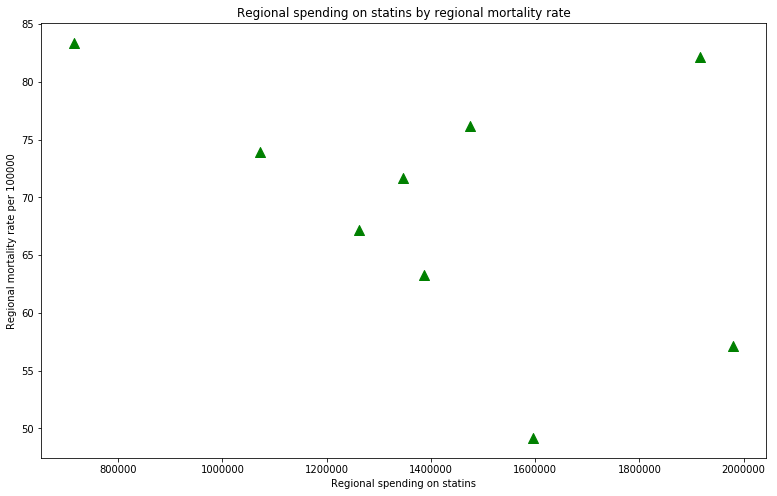

In [68]:
# Regional statin spending versus mortality rate.
N = 9
x = df_statin_plot['act_cost']
y = df_statin_plot['mortality_rate_per_100000']

plt.title('Regional spending on statins by regional mortality rate')
plt.ylabel('Regional mortality rate per 100000')
plt.xlabel('Regional spending on statins')
plt.scatter(x, y, c='g', s=100, alpha=1.0, marker='^')
plt.gcf().set_size_inches(13,8)
plt.show()

In [69]:
#

### Assessment of the correlation between the relative spending for statin prescriptions in each region and the mortality rate from cardiovascular diseases.

In [70]:
# Relative_patient_cost by regional level.
df_stat_reg_rel = df_mortality_spend_stat['relative_patient_cost'].groupby(df_mortality_spend_stat['level']).sum()
df_stat_reg_relative = pd.DataFrame(df_stat_reg_rel).reset_index()
df_stat_reg_relative

# Tabulation of mortality_rate_per_100000 and relative_patient_cost by the nine regional level code.
df_statin_plot_rel = pd.merge(df_statin_plot[['level', 'mortality_rate_per_100000']], df_stat_reg_relative[['level', 'relative_patient_cost']], on='level').round(2)
df_statin_plot_rel

,level,mortality_rate_per_100000,relative_patient_cost
0,e12000001,83.37,101.80
1,e12000002,82.13,302.33
2,e12000003,76.22,200.16
3,e12000004,73.92,135.23
4,e12000005,71.67,202.06
5,e12000006,63.25,171.25
6,e12000007,49.18,1241.93
7,e12000008,57.13,234.76
8,e12000009,67.20,155.02


In [71]:
# Descriptive statistics for the relative_patient_cost and the mortality_rate_per_100000 persons across the nine English regions.
df_statin_plot_rel.describe()

,mortality_rate_per_100000,relative_patient_cost
count,9.000000,9.000000
mean,69.341111,304.948889
std,11.354196,356.170923
min,49.180000,101.800000
25%,63.250000,155.020000
50%,71.670000,200.160000
75%,76.220000,234.760000
max,83.370000,1241.930000


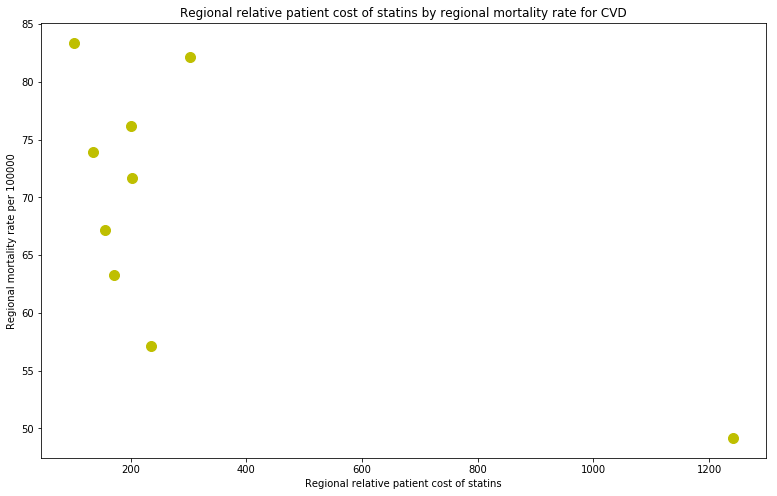

In [72]:
# Scatter plot of mortality_rate_per_100000 and relative_patient_cost.
N = 9
x = df_statin_plot_rel['relative_patient_cost']
y = df_statin_plot_rel['mortality_rate_per_100000']

plt.title('Regional relative patient cost of statins by regional mortality rate for CVD')
plt.ylabel('Regional mortality rate per 100000')
plt.xlabel('Regional relative patient cost of statins')
plt.scatter(x, y, c='y', s=100, alpha=1.0, marker='o')
plt.gcf().set_size_inches(13,8)
plt.show()

In [73]:
# Correlation between the regional relative patient cost of statins and regional mortality rate per 100000 persons for the nine regionsl
df_statin_plot_rel.corr()

,mortality_rate_per_100000,relative_patient_cost
mortality_rate_per_100000,1.00000,-0.66515
relative_patient_cost,-0.66515,1.00000


In [74]:
# Removing the largest outlier.
df_statin_plot_rel_outlier = df_statin_plot_rel[df_statin_plot_rel['relative_patient_cost'] < 320]
df_statin_plot_rel_outlier

,level,mortality_rate_per_100000,relative_patient_cost
0,e12000001,83.37,101.80
1,e12000002,82.13,302.33
2,e12000003,76.22,200.16
3,e12000004,73.92,135.23
4,e12000005,71.67,202.06
5,e12000006,63.25,171.25
7,e12000008,57.13,234.76
8,e12000009,67.20,155.02


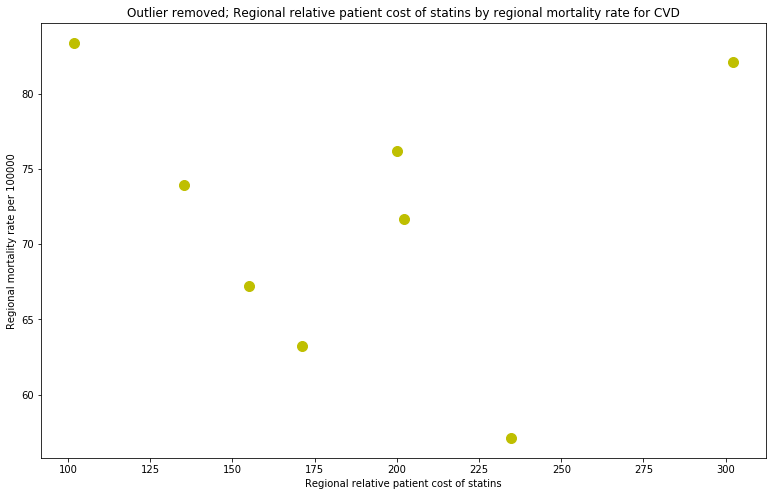

In [75]:
# Scatter plot of mortality_rate_per_100000 and relative_patient_cost with outlier removed.
N = 9
x = df_statin_plot_rel_outlier['relative_patient_cost']
y = df_statin_plot_rel_outlier['mortality_rate_per_100000']

plt.title('Outlier removed; Regional relative patient cost of statins by regional mortality rate for CVD')
plt.ylabel('Regional mortality rate per 100000')
plt.xlabel('Regional relative patient cost of statins')
plt.scatter(x, y, c='y', s=100, alpha=1.0, marker='o')
plt.gcf().set_size_inches(13,8)
plt.show()

In [76]:
# Outlier removed; Correlation between the regional relative patient cost of statins and regional mortality rate per 100000 persons for the nine regionsl
df_statin_plot_rel_outlier.corr()

,mortality_rate_per_100000,relative_patient_cost
mortality_rate_per_100000,1.000000,-0.067642
relative_patient_cost,-0.067642,1.000000


### Summary:
### There is a negative correlation between the regional relative patient cost of statins and the regional mortality rate per 100000 persons.
### This negative correlation is not strongly affected by the outlier as shown in the correlation coefficients below;
### -0.0665 with the outlier included.
### -0.0676 with the outlier excluded.

In [77]:
#